## ZADANIE 3

In [9]:
import itertools
import numpy as np
import random
import time
from tqdm import tqdm
import matplotlib.pyplot as plt

In [20]:
# BERLIN52

n = 52
print('Problem size: %d' % n)

coords = np.array([565.0, 575.0, 25.0, 185.0, 345.0, 750.0, 945.0, 685.0, 845.0, 655.0, 880.0, 660.0, 25.0, 230.0, 525.0, 1000.0, 580.0, 1175.0, 650.0, 1130.0, 1605.0, 620.0, 1220.0, 580.0, 1465.0, 200.0, 1530.0, 5.0, 845.0, 680.0, 725.0, 370.0, 145.0, 665.0, 415.0, 635.0, 510.0, 875.0, 560.0, 365.0, 300.0, 465.0, 520.0, 585.0, 480.0, 415.0, 835.0, 625.0, 975.0, 580.0, 1215.0, 245.0, 1320.0, 315.0, 1250.0, 400.0, 660.0, 180.0, 410.0, 250.0, 420.0, 555.0, 575.0, 665.0, 1150.0, 1160.0, 700.0, 580.0, 685.0, 595.0, 685.0, 610.0, 770.0, 610.0, 795.0, 645.0, 720.0, 635.0, 760.0, 650.0, 475.0, 960.0, 95.0, 260.0, 875.0, 920.0, 700.0, 500.0, 555.0, 815.0, 830.0, 485.0, 1170.0, 65.0, 830.0, 610.0, 605.0, 625.0, 595.0, 360.0, 1340.0, 725.0, 1740.0, 245.0])
coords = coords.reshape(n, 2)

A = np.empty((n, n))
for i in range(n):
    for j in range(n):
        A[i, j] = np.sqrt(((coords[i, :] - coords[j, :])**2).sum())
print('Distance matrix:\n', A)

p = [0, 48, 31, 44, 18, 40,  7,  8,  9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24,  3,  5, 14,  4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29,  1,  6, 41, 20, 16,  2, 17, 30, 21]
print('Optimal solution:\n', p)

Problem size: 52
Distance matrix:
 [[   0.          666.10809934  281.11385594 ...  217.08293346
   789.38267019 1220.46097848]
 [ 666.10809934    0.          649.32657423 ...  596.25917184
  1421.55724471 1716.04924172]
 [ 281.11385594  649.32657423    0.         ...  463.24939288
   995.3140208  1483.59361012]
 ...
 [ 217.08293346  596.25917184  463.24939288 ...    0.
   829.60834133 1150.76061803]
 [ 789.38267019 1421.55724471  995.3140208  ...  829.60834133
     0.          624.81997407]
 [1220.46097848 1716.04924172 1483.59361012 ... 1150.76061803
   624.81997407    0.        ]]
Optimal solution:
 [0, 48, 31, 44, 18, 40, 7, 8, 9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24, 3, 5, 14, 4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29, 1, 6, 41, 20, 16, 2, 17, 30, 21]


In [15]:
def PMX(parent1, parent2):
    size = len(parent1)
    offspring1, offspring2 = np.array(parent1), np.array(parent2)
    start, end = np.sort(np.random.choice(range(size), 2, replace=False))
    offspring1[start:end+1], offspring2[start:end+1] = parent2[start:end+1].copy(), parent1[start:end+1].copy()
    
    mapping1 = {parent2[i]: parent1[i] for i in range(start, end + 1)}
    mapping2 = {parent1[i]: parent2[i] for i in range(start, end + 1)}
    
    def apply_mapping(offspring, mapping, start, end):
        for i in list(range(0, start)) + list(range(end + 1, size)):
            original = offspring[i]
            while original in mapping:
                original = mapping[original]
            offspring[i] = original

    apply_mapping(offspring1, mapping1, start, end)
    apply_mapping(offspring2, mapping2, start, end)
    
    return offspring1, offspring2


def reverse_sequence_mutation(p):
    a = np.random.choice(len(p), 2, False)
    i, j = a.min(), a.max()
    q = p.copy()
    q[i:j+1] = q[i:j+1][::-1]
    return q

def tsp_objective_function(p):
    s = 0.0
    for i in range(n):
        s += A[p[i-1], p[i]]
    return s


In [22]:
def find_best_permutation_with_k_differences(original_perm, k, objective_function):
    original_perm = np.array(original_perm)
    min_function_value = float('inf')
    best_permutation = original_perm.copy()
    indices = np.arange(len(original_perm))
    k_index_combinations = itertools.combinations(indices, k)
    
    for index_subset in k_index_combinations:
        selected_elements = original_perm[list(index_subset)]
        
        for perm in list(itertools.permutations(selected_elements))[1:]:
            modified_perm = original_perm.copy()
            modified_perm[list(index_subset)] = perm
            
            current_value = objective_function(modified_perm)
            
            if current_value < min_function_value:
                min_function_value = current_value
                best_permutation = modified_perm.copy()
    
    return best_permutation


def find_best_permutation_with_k_differences_iterate(original_perm, k, objective_function):
    original_perm = np.array(original_perm)
    current_permutation = original_perm.copy()
    min_function_value = objective_function(current_permutation)

    while True:
        improved = False
        indices = np.arange(len(current_permutation))
        k_index_combinations = itertools.combinations(indices, k)

        for index_subset in k_index_combinations:
            selected_elements = current_permutation[list(index_subset)]
            
            for perm in list(itertools.permutations(selected_elements))[1:]:
                modified_perm = current_permutation.copy()
                modified_perm[list(index_subset)] = perm
                
                current_value = objective_function(modified_perm)
                
                if current_value < min_function_value:
                    min_function_value = current_value
                    current_permutation = modified_perm.copy()
                    improved = True
                    break 

            if improved:
                break 
        
        if not improved:
            break

    return current_permutation



In [23]:
population_size = 500
chromosome_length = n
number_of_offspring = population_size
crossover_probability = 0.95
mutation_probability = 0.25
number_of_iterations = 250

time0 = time.time()

def sga(population_size, chromosome_length, number_of_offspring, crossover_probability, mutation_probability, number_of_iterations, mutation_function, crossover, printing=True):
    costs=[]
    best_objective_value = np.Inf
    best_chromosome = np.zeros((1, chromosome_length))
    
    # generating an initial population
    current_population = np.zeros((population_size, chromosome_length), dtype=np.int64)
    for i in range(population_size):
        current_population[i, :] = np.random.permutation(chromosome_length)
    
    # evaluating the objective function on the current population
    objective_values = np.zeros(population_size)
    for i in range(population_size):
        objective_values[i] = tsp_objective_function(current_population[i, :])
    
    for t in range(number_of_iterations):
    
        # selecting the parent indices by the roulette wheel method
        fitness_values = objective_values.max() - objective_values
        if fitness_values.sum() > 0:
            fitness_values = fitness_values / fitness_values.sum()
        else:
            fitness_values = np.ones(population_size) / population_size
        parent_indices = np.random.choice(population_size, number_of_offspring, True, fitness_values).astype(np.int64)
    
        # creating the children population
        children_population = np.zeros((number_of_offspring, chromosome_length), dtype=np.int64)
        for i in range(int(number_of_offspring/2)):
            if np.random.random() < crossover_probability:
                children_population[2*i, :], children_population[2*i+1, :] = crossover(current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1], :].copy())
            else:
                children_population[2*i, :], children_population[2*i+1, :] = current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1]].copy()
        if np.mod(number_of_offspring, 2) == 1:
            children_population[-1, :] = current_population[parent_indices[-1], :]
    
        # mutating the children population
        for i in range(number_of_offspring):
            if np.random.random() < mutation_probability:
                children_population[i, :] = mutation_function(children_population[i, :])
    
        # evaluating the objective function on the children population
        children_objective_values = np.zeros(number_of_offspring)
        for i in range(number_of_offspring):
            children_objective_values[i] = tsp_objective_function(children_population[i, :])
    
        # replacing the current population by (Mu + Lambda) Replacement
        objective_values = np.hstack([objective_values, children_objective_values])
        current_population = np.vstack([current_population, children_population])
    
        I = np.argsort(objective_values)
        current_population = current_population[I[:population_size], :]
        objective_values = objective_values[I[:population_size]]
    
        # recording some statistics
        if best_objective_value < objective_values[0]:
            best_objective_value = objective_values[0]
            best_chromosome = current_population[0, :]

        costs.append(objective_values.min())
        if(printing):
            print('%3d %14.8f %12.8f %12.8f %12.8f %12.8f' % (t, time.time() - time0, objective_values.min(), objective_values.mean(), objective_values.max(), objective_values.std()))
    return objective_values.min(), costs


In [24]:
def sga3(population_size, chromosome_length, number_of_offspring, crossover_probability, mutation_probability, mutation_probability2, number_of_iterations, mutation_function, crossover, objective_function, additional_mutation, k, printing=True):
    costs=[]
    best_objective_value = np.Inf
    best_chromosome = np.zeros((1, chromosome_length))
    
    # generating an initial population
    current_population = np.zeros((population_size, chromosome_length), dtype=np.int64)
    for i in range(population_size):
        current_population[i, :] = np.random.permutation(chromosome_length)
    
    # evaluating the objective function on the current population
    objective_values = np.zeros(population_size)
    for i in range(population_size):
        objective_values[i] = objective_function(current_population[i, :])
    
    for t in (range(number_of_iterations)):
    
        # selecting the parent indices by the roulette wheel method
        fitness_values = objective_values.max() - objective_values
        if fitness_values.sum() > 0:
            fitness_values = fitness_values / fitness_values.sum()
        else:
            fitness_values = np.ones(population_size) / population_size
        parent_indices = np.random.choice(population_size, number_of_offspring, True, fitness_values).astype(np.int64)
    
        # creating the children population
        children_population = np.zeros((number_of_offspring, chromosome_length), dtype=np.int64)
        for i in range(int(number_of_offspring/2)):
            if np.random.random() < crossover_probability:
                children_population[2*i, :], children_population[2*i+1, :] = crossover(current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1], :].copy())
            else:
                children_population[2*i, :], children_population[2*i+1, :] = current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1]].copy()
        if np.mod(number_of_offspring, 2) == 1:
            children_population[-1, :] = current_population[parent_indices[-1], :]
    
        # mutating the children population
        for i in range(number_of_offspring):
            if np.random.random() < mutation_probability:
                children_population[i, :] = mutation_function(children_population[i, :])
            if np.random.random() < mutation_probability2:
                children_population[i, :] = additional_mutation(children_population[i, :], k, objective_function)
    
        # evaluating the objective function on the children population
        children_objective_values = np.zeros(number_of_offspring)
        for i in range(number_of_offspring):
            children_objective_values[i] = objective_function(children_population[i, :])
    
        # replacing the current population by (Mu + Lambda) Replacement
        objective_values = np.hstack([objective_values, children_objective_values])
        current_population = np.vstack([current_population, children_population])
    
        I = np.argsort(objective_values)
        current_population = current_population[I[:population_size], :]
        objective_values = objective_values[I[:population_size]]
    
        # recording some statistics
        if best_objective_value < objective_values[0]:
            best_objective_value = objective_values[0]
            best_chromosome = current_population[0, :]

        costs.append(objective_values.min())
        if(printing):
            print('%3d %14.8f %12.8f %12.8f %12.8f %12.8f' % (t, time.time() - time0, objective_values.min(), objective_values.mean(), objective_values.max(), objective_values.std()))
    return objective_values.min(), costs


In [39]:
population_size = 500
chromosome_length = n
number_of_offspring = population_size
crossover_probability = 0.95
mutation_probability = 0.25
number_of_iterations = 150
k=2
f=find_best_permutation_with_k_differences

time0 = time.time()

obj_min, costs=sga3(population_size, chromosome_length, number_of_offspring, crossover_probability, mutation_probability, mutation_probability, number_of_iterations, reverse_sequence_mutation, PMX, tsp_objective_function, f, k)


  0     2.06650233 23540.01859821 28157.85605055 29722.64336877 1226.28278585
  1     4.56608844 21994.38737239 26409.93904226 28041.00911927 1270.49532603
  2     6.77048564 21044.60244803 24951.73134155 26415.46815405 1111.54014606
  3     9.38100004 19608.16323474 23852.06040500 25138.32764730 1028.23051823
  4    11.81052566 19608.16323474 22945.21118852 24163.07070664 1012.20099446
  5    14.19279599 18702.03988788 22080.38979033 23327.70334437 927.94282114
  6    16.43777061 18453.55951050 21414.15697985 22494.69759248 841.59013968
  7    18.67443824 17946.41795269 20787.53732706 21848.27064132 785.36665458
  8    21.20008636 17450.08956693 20287.20267580 21231.16417971 742.71165350
  9    23.32561755 17123.99524973 19851.00008039 20744.68855254 719.92196007
 10    25.63197851 16810.37472438 19419.04878101 20350.92001976 739.17336072
 11    28.10731936 16349.39662500 18978.89157163 19916.69312514 725.49798771
 12    30.84955525 16213.60987041 18537.17132597 19386.16971382 689.661

In [34]:
org_sga_min, org_sga_costs=sga(population_size, chromosome_length, number_of_offspring, crossover_probability, mutation_probability, number_of_iterations, reverse_sequence_mutation, PMX)

  0   342.02553964 24398.63788605 28342.69617879 29630.90981542 981.56180080
  1   342.04245067 23642.08642821 27369.02826298 28463.53537984 889.88088012
  2   342.05852294 23306.61410847 26555.47156874 27595.91589026 846.10284235
  3   342.07466650 22019.48321923 25844.93463766 26849.60651684 808.47157239
  4   342.09031987 19775.62693009 25157.29546442 26158.98409999 843.44691757
  5   342.10735917 19614.89362535 24491.43650130 25445.03796217 842.64913469
  6   342.12497902 19594.89737422 23881.89628331 24865.37749688 883.89215906
  7   342.14088249 19594.89737422 23273.56888488 24237.11301646 896.24501879
  8   342.15637708 19134.20483421 22607.88166381 23631.39406521 879.32941525
  9   342.17176461 18616.85400823 21942.84030450 22968.32040046 895.23917301
 10   342.18741655 18616.85400823 21193.21560154 22293.85688112 876.95222206
 11   342.20741010 18458.12046232 20442.74651665 21477.72119631 687.83642655
 12   342.22410202 17849.53101368 19948.00281876 20670.67877486 480.39078723

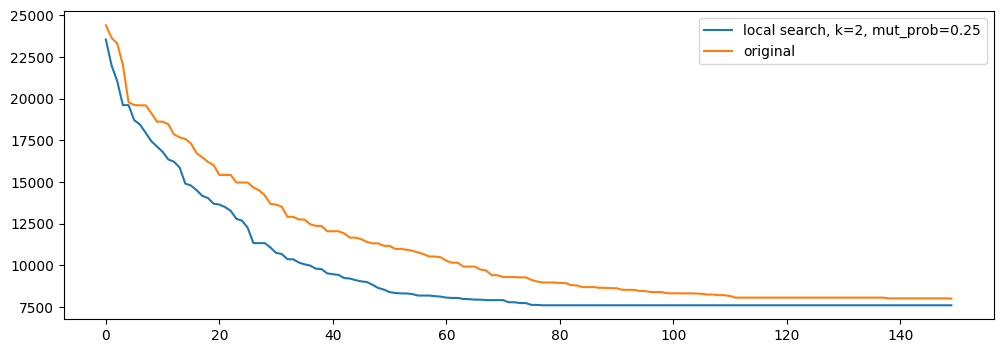

In [40]:
plt.figure(figsize=(12,4))
plt.plot(costs, label="local search, k=2, mut_prob=0.25")
plt.plot(org_sga_costs, label="original")
plt.legend()
plt.show()

In [36]:
population_size = 500
chromosome_length = n
number_of_offspring = population_size
crossover_probability = 0.95
mutation_probability = 0.25
number_of_iterations = 150
k=2
f=find_best_permutation_with_k_differences
mutation_probability2 = 0.1

time0 = time.time()

obj_min_2, costs_2=sga3(population_size, chromosome_length, number_of_offspring, crossover_probability, mutation_probability, mutation_probability2, number_of_iterations, reverse_sequence_mutation, PMX, tsp_objective_function, f, k)

  0     0.95319772 23159.02967330 28193.33021099 29604.92859045 1075.80613421
  1     1.96579885 22571.15067198 26835.74376957 28110.37167367 1052.53249933
  2     2.98553562 21411.91103741 25708.73710460 27013.98608590 1082.91761772
  3     3.92829633 20149.54803693 24740.30940580 25971.42855138 1037.51127596
  4     4.94849658 19083.47232894 23855.52626380 25110.33725163 1020.72193427
  5     5.98158073 18713.46186821 23043.44255116 24249.19534633 939.22894181
  6     6.94994235 17589.34866189 22429.99129359 23516.75903537 890.97980088
  7     7.76507783 17294.59757778 21829.78569187 22837.35481740 894.28740501
  8     8.56591225 16384.41305011 21184.28214462 22277.08682773 979.61563298
  9     9.39188004 16307.84381221 20504.62328230 21674.66389750 1103.81378255
 10    10.38259363 16307.84381221 19740.92757737 21036.43098475 1098.36528891
 11    11.46707177 15737.45635166 18786.96669444 20149.54803693 934.31761721
 12    12.25201797 15439.47344934 17957.75948245 19018.40295760 717.0

In [42]:
f=find_best_permutation_with_k_differences_iterate
obj_min_i, costs_i=sga3(population_size, chromosome_length, number_of_offspring, crossover_probability, mutation_probability, mutation_probability2, number_of_iterations, reverse_sequence_mutation, PMX, tsp_objective_function, f, k)

  0   421.51867914 8820.46174731 26477.93093963 29580.30522587 5594.55129381
  1   440.32110906 8794.78680797 16693.80365224 26809.61609319 5848.11922864
  2   461.90676594 8794.78680797 12326.61048609 15429.41642665 1877.14551477
  3   482.23787951 8794.78680797 11207.97983888 13229.72578344 1242.92633792
  4   502.56732917 8580.59683324 10622.40230157 12203.96986992 914.62317091
  5   522.46787763 8580.59683324 10207.22816718 11354.00473969 664.73032622
  6   536.83241487 8580.59683324 9979.66227009 10911.09331686 543.11269297
  7   555.40710568 8580.59683324 9773.29883797 10440.45674005 439.84763666
  8   567.03677654 8577.99274695 9621.65679602 10221.42749869 395.45568533
  9   582.23674083 8506.89785645 9504.25399765 10025.25432911 361.95997671
 10   598.77158809 8506.89785645 9387.49873668 9880.17505883 327.48321856
 11   608.20956016 8506.89785645 9299.44001833 9726.66133387 293.44396282
 12   621.66691422 8144.36071808 9230.70181989 9621.09254382 277.87468519
 13   639.50819802

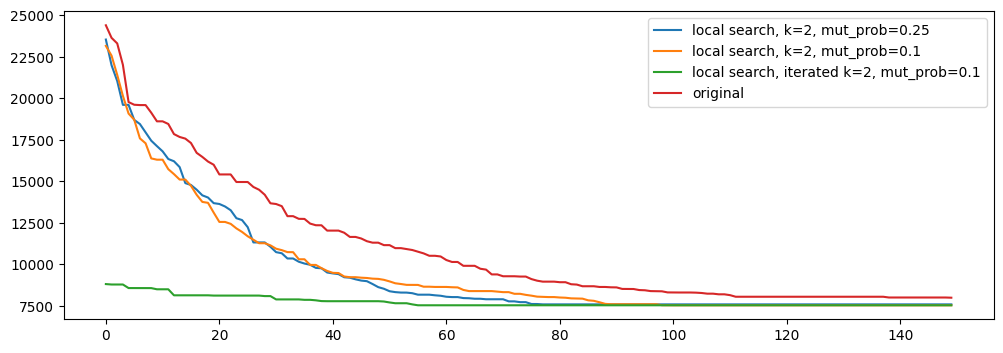

In [43]:
plt.figure(figsize=(12,4))
plt.plot(costs, label="local search, k=2, mut_prob=0.25")
plt.plot(costs_2, label="local search, k=2, mut_prob=0.1")
plt.plot(costs_i, label="local search, iterated k=2, mut_prob=0.1")
plt.plot(org_sga_costs, label="original")
plt.legend()
plt.show()

## ZADANIE 4

In [10]:
import urllib.request
from tqdm import tqdm 
import numpy as np

QAP_INSTANCE_URL_NUG = 'https://qaplib.mgi.polymtl.ca/data.d/nug'

def read_instance(QAP_INSTANCE_URL):
    qap_instance_file = urllib.request.urlopen(QAP_INSTANCE_URL)
    
    n = int(qap_instance_file.readline().decode().strip().split()[0])
    num_elements = n * n
    
    data = []
    for line in qap_instance_file:
        data.extend(map(int, line.decode().strip().split()))
    A = np.array(data[:num_elements]).reshape((n, n))
    B = np.array(data[num_elements:]).reshape((n, n))

    #print(n, A.shape, B.shape)

    return n, A, B

def qap_objective_function(p,n,A,B):
    s = 0.0
    for i in range(n):
        s += (A[i, :] * B[p[i], p]).sum() #flow dla obiektu i * dystans po przeniesieniu go do pozycji zdefiniowanej w p[i]
    return s


In [11]:
def find_best_permutation_with_k_differences4(n, A, B, original_perm, k, objective_function):
    original_perm = np.array(original_perm)
    current_permutation = original_perm.copy()
    min_function_value = objective_function(current_permutation, n, A, B)

    while True:
        improved = False
        indices = np.arange(len(current_permutation))
        k_index_combinations = itertools.combinations(indices, k)

        for index_subset in k_index_combinations:
            selected_elements = current_permutation[list(index_subset)]
            
            for perm in list(itertools.permutations(selected_elements))[1:]:
                modified_perm = current_permutation.copy()
                modified_perm[list(index_subset)] = perm
                
                current_value = objective_function(modified_perm,n, A, B)
                
                if current_value < min_function_value:
                    min_function_value = current_value
                    current_permutation = modified_perm.copy()
                    improved = True
                    break 

            if improved:
                break 
        
        if not improved:
            break

    return current_permutation


def sga4(A,B,n,population_size, chromosome_length, number_of_offspring, crossover_probability, mutation_probability, number_of_iterations, mutation_function, crossover, additional_mutation,printing=True):
    costs=[]
    best_objective_value = np.Inf
    best_chromosome = np.zeros((1, chromosome_length))
    
    # generating an initial population
    current_population = np.zeros((population_size, chromosome_length), dtype=np.int64)
    for i in range(population_size):
        current_population[i, :] = np.random.permutation(chromosome_length)
    
    # evaluating the objective function on the current population
    objective_values = np.zeros(population_size)
    for i in range(population_size):
        objective_values[i] = qap_objective_function(current_population[i, :],n,A,B)
    
    for t in tqdm(range(number_of_iterations)):
    
        # selecting the parent indices by the roulette wheel method
        fitness_values = objective_values.max() - objective_values
        if fitness_values.sum() > 0:
            fitness_values = fitness_values / fitness_values.sum()
        else:
            fitness_values = np.ones(population_size) / population_size
        parent_indices = np.random.choice(population_size, number_of_offspring, True, fitness_values).astype(np.int64)
    
        # creating the children population
        children_population = np.zeros((number_of_offspring, chromosome_length), dtype=np.int64)
        for i in range(int(number_of_offspring/2)):
            if np.random.random() < crossover_probability:
                children_population[2*i, :], children_population[2*i+1, :] = crossover(current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1], :].copy())
            else:
                children_population[2*i, :], children_population[2*i+1, :] = current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1]].copy()
        if np.mod(number_of_offspring, 2) == 1:
            children_population[-1, :] = current_population[parent_indices[-1], :]
    
        # mutating the children population
        for i in range(number_of_offspring):
            if np.random.random() < mutation_probability:
                children_population[i, :] = mutation_function(children_population[i, :])
            if np.random.random() < mutation_probability:
                children_population[i, :] = additional_mutation(n, A, B, children_population[i, :], 2, qap_objective_function)
    
        # evaluating the objective function on the children population
        children_objective_values = np.zeros(number_of_offspring)
        for i in range(number_of_offspring):
            children_objective_values[i] = qap_objective_function(children_population[i, :], n, A ,B)
    
        # replacing the current population by (Mu + Lambda) Replacement
        objective_values = np.hstack([objective_values, children_objective_values])
        current_population = np.vstack([current_population, children_population])
    
        I = np.argsort(objective_values)
        current_population = current_population[I[:population_size], :]
        objective_values = objective_values[I[:population_size]]
    
        # recording some statistics
        if best_objective_value < objective_values[0]:
            best_objective_value = objective_values[0]
            best_chromosome = current_population[0, :]

        costs.append(objective_values.min())
        if(printing):
            print('%3d %14.8f %12.8f %12.8f %12.8f %12.8f' % (t, time.time() - time0, objective_values.min(), objective_values.mean(), objective_values.max(), objective_values.std()))
    return objective_values.min(), costs


In [12]:
instances=['12', '14', '16a', '16b', '17', '18', '20', '21', '22', '24', '25', '27', '28', '30']  

In [18]:
for i in instances:
    instance_url=QAP_INSTANCE_URL_NUG + i + '.dat'
    n, A, B = read_instance(instance_url)
    population_size = 500
    chromosome_length = n
    number_of_offspring = population_size
    crossover_probability = 0.95
    mutation_probability = 0.25
    number_of_iterations = 50
    time0 = time.time()
    print("NUG "+i)
    res, _ = sga4(A, B,n, population_size, chromosome_length, number_of_offspring, crossover_probability, mutation_probability, number_of_iterations, reverse_sequence_mutation, PMX, find_best_permutation_with_k_differences4, False)
    print(res)

NUG 12


100%|███████████████████████████████████████████| 50/50 [00:28<00:00,  1.78it/s]


578.0
NUG 14


100%|███████████████████████████████████████████| 50/50 [00:48<00:00,  1.04it/s]


1014.0
NUG 16a


100%|███████████████████████████████████████████| 50/50 [01:13<00:00,  1.47s/it]


1610.0
NUG 16b


100%|███████████████████████████████████████████| 50/50 [01:35<00:00,  1.92s/it]


1240.0
NUG 17


100%|███████████████████████████████████████████| 50/50 [01:40<00:00,  2.01s/it]


1734.0
NUG 18


100%|███████████████████████████████████████████| 50/50 [02:08<00:00,  2.58s/it]


1930.0
NUG 20


100%|███████████████████████████████████████████| 50/50 [03:28<00:00,  4.16s/it]


2570.0
NUG 21


100%|███████████████████████████████████████████| 50/50 [04:20<00:00,  5.20s/it]


2438.0
NUG 22


100%|███████████████████████████████████████████| 50/50 [05:22<00:00,  6.45s/it]


3596.0
NUG 24


100%|███████████████████████████████████████████| 50/50 [07:40<00:00,  9.22s/it]


3488.0
NUG 25


100%|███████████████████████████████████████████| 50/50 [10:45<00:00, 12.92s/it]


3744.0
NUG 27


100%|███████████████████████████████████████████| 50/50 [10:35<00:00, 12.71s/it]


5234.0
NUG 28


100%|███████████████████████████████████████████| 50/50 [11:51<00:00, 14.22s/it]


5166.0
NUG 30


100%|███████████████████████████████████████████| 50/50 [22:58<00:00, 27.57s/it]

6124.0


OPTIMAL SOLUTIONS:
- Nug12: 578
- Nug14: 1014
- Nug15: 1150
- Nug16a: 1610
- Nug16b: 1240
- Nug17: 1732
- Nug18: 1930
- Nug20: 2570
- Nug21: 2438
- Nug22: 3596
- Nug24: 3488
- Nug25: 3744
- Nug27: 5234
- Nug28: 5166
- Nug30: 6124


In [30]:
def sga4tai(A,B,n,population_size, chromosome_length, number_of_offspring, crossover_probability, mutation_probability, number_of_iterations, mutation_function, crossover, additional_mutation,printing=True):
    costs=[]
    best_objective_value = np.Inf
    best_chromosome = np.zeros((1, chromosome_length))
    
    # generating an initial population
    current_population = np.zeros((population_size, chromosome_length), dtype=np.int64)
    for i in range(population_size):
        current_population[i, :] = np.random.permutation(chromosome_length)
    
    # evaluating the objective function on the current population
    objective_values = np.zeros(population_size)
    for i in range(population_size):
        objective_values[i] = qap_objective_function(current_population[i, :],n,A,B)
    
    for t in tqdm(range(number_of_iterations)):
    
        # selecting the parent indices by the roulette wheel method
        fitness_values = objective_values.max() - objective_values
        if fitness_values.sum() > 0:
            fitness_values = fitness_values / fitness_values.sum()
        else:
            fitness_values = np.ones(population_size) / population_size
        parent_indices = np.random.choice(population_size, number_of_offspring, True, fitness_values).astype(np.int64)
    
        # creating the children population
        children_population = np.zeros((number_of_offspring, chromosome_length), dtype=np.int64)
        for i in range(int(number_of_offspring/2)):
            if np.random.random() < crossover_probability:
                children_population[2*i, :], children_population[2*i+1, :] = crossover(current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1], :].copy())
            else:
                children_population[2*i, :], children_population[2*i+1, :] = current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1]].copy()
        if np.mod(number_of_offspring, 2) == 1:
            children_population[-1, :] = current_population[parent_indices[-1], :]
    
        # mutating the children population
        for i in range(number_of_offspring):
            if np.random.random() < mutation_probability:
                children_population[i, :] = mutation_function(children_population[i, :])
            if np.random.random() < 0.1:
                children_population[i, :] = additional_mutation(n, A, B, children_population[i, :], 2, qap_objective_function)
    
        # evaluating the objective function on the children population
        children_objective_values = np.zeros(number_of_offspring)
        for i in range(number_of_offspring):
            children_objective_values[i] = qap_objective_function(children_population[i, :], n, A ,B)
    
        # replacing the current population by (Mu + Lambda) Replacement
        objective_values = np.hstack([objective_values, children_objective_values])
        current_population = np.vstack([current_population, children_population])
    
        I = np.argsort(objective_values)
        current_population = current_population[I[:population_size], :]
        objective_values = objective_values[I[:population_size]]
    
        # recording some statistics
        if best_objective_value < objective_values[0]:
            best_objective_value = objective_values[0]
            best_chromosome = current_population[0, :]

        costs.append(objective_values.min())
        if(printing):
            print('%3d %14.8f %12.8f %12.8f %12.8f %12.8f' % (t, time.time() - time0, objective_values.min(), objective_values.mean(), objective_values.max(), objective_values.std()))
    return objective_values.min(), costs


In [31]:
#Tai50a, Tai60a, Tai80a
INSTANCE_URL_TAI = 'https://qaplib.mgi.polymtl.ca/data.d/tai'
instances=['50', '60', '80']
for i in instances:
    instance_url=INSTANCE_URL_TAI + i + 'a.dat'
    n, A, B = read_instance(instance_url)
    population_size = 500
    chromosome_length = n
    number_of_offspring = population_size
    crossover_probability = 0.95
    mutation_probability = 0.25
    number_of_iterations = 100
    time0 = time.time()
    print("TAI "+i)
    res, _ = sga4tai(A, B,n, population_size, chromosome_length, number_of_offspring, crossover_probability, mutation_probability, number_of_iterations, reverse_sequence_mutation, PMX, find_best_permutation_with_k_differences4)
    print(res)

TAI 50


  1%|▍                                       | 1/100 [01:56<3:11:48, 116.25s/it]

  0   116.31205440 5111318.00000000 5779245.70000000 5897922.00000000 210788.86152663


  2%|▊                                       | 2/100 [03:24<2:43:22, 100.03s/it]

  1   204.98337340 5111318.00000000 5551835.14800000 5819170.00000000 241789.87923432


  3%|█▏                                       | 3/100 [04:29<2:15:40, 83.92s/it]

  2   269.74490213 5090514.00000000 5403976.75200000 5652572.00000000 183837.71841085


  4%|█▋                                       | 4/100 [05:51<2:13:08, 83.21s/it]

  3   351.87136912 5090514.00000000 5317220.74400000 5547376.00000000 143121.79639741


  5%|██                                       | 5/100 [07:33<2:22:22, 89.92s/it]

  4   453.67592955 5083782.00000000 5248377.46400000 5435646.00000000 101285.81110099


  6%|██▍                                      | 6/100 [08:44<2:10:44, 83.45s/it]

  5   524.57879257 5083782.00000000 5215890.49200000 5377328.00000000 75228.65111181


  7%|██▊                                      | 7/100 [09:54<2:02:41, 79.16s/it]

  6   594.89672422 5083782.00000000 5189583.19600000 5311814.00000000 49739.83364686


  8%|███▎                                     | 8/100 [11:23<2:05:49, 82.06s/it]

  7   683.16950727 5083782.00000000 5170491.37600000 5228980.00000000 30443.47698215


  9%|███▋                                     | 9/100 [12:35<1:59:53, 79.05s/it]

  8   755.60022235 5066772.00000000 5161648.47200000 5203448.00000000 26932.50632647


 10%|████                                    | 10/100 [13:47<1:55:06, 76.74s/it]

  9   827.16804528 5066772.00000000 5155633.59200000 5193104.00000000 24878.20798324


 11%|████▍                                   | 11/100 [15:22<2:02:06, 82.33s/it]

 10   922.15662169 5066772.00000000 5150113.07200000 5183944.00000000 23080.60134890


 12%|████▊                                   | 12/100 [16:47<2:02:19, 83.40s/it]

 11  1008.01907706 5066772.00000000 5145265.54800000 5178676.00000000 21609.73012094


 13%|█████▏                                  | 13/100 [18:18<2:03:58, 85.49s/it]

 12  1098.33111167 5066772.00000000 5141428.85600000 5172020.00000000 20175.30438579


 14%|█████▌                                  | 14/100 [19:27<1:55:38, 80.69s/it]

 13  1167.90494823 5066772.00000000 5137369.16800000 5164882.00000000 19148.97581752


 15%|██████                                  | 15/100 [20:32<1:47:22, 75.79s/it]

 14  1232.34435511 5066772.00000000 5134376.21600000 5161728.00000000 18422.28567929


 16%|██████▍                                 | 16/100 [21:43<1:44:23, 74.56s/it]

 15  1304.06112313 5066772.00000000 5131201.99200000 5154556.00000000 17666.34746675


 17%|██████▊                                 | 17/100 [23:11<1:48:26, 78.39s/it]

 16  1391.35470939 5066772.00000000 5128390.22000000 5150954.00000000 17316.91608502


 18%|███████▏                                | 18/100 [24:15<1:41:29, 74.27s/it]

 17  1456.02251506 5066772.00000000 5126536.08000000 5149314.00000000 16902.08450794


 19%|███████▌                                | 19/100 [25:27<1:39:20, 73.58s/it]

 18  1528.01431370 5066772.00000000 5123087.25600000 5145146.00000000 16248.23839973


 20%|████████                                | 20/100 [26:51<1:41:58, 76.48s/it]

 19  1611.24164963 5041156.00000000 5120135.38400000 5142438.00000000 16295.19911350


 21%|████████▍                               | 21/100 [28:06<1:40:09, 76.07s/it]

 20  1686.35013700 5041156.00000000 5117097.40400000 5138866.00000000 15617.60943924


 22%|████████▊                               | 22/100 [29:21<1:38:22, 75.67s/it]

 21  1761.08712721 5041156.00000000 5114559.16800000 5135582.00000000 14948.32052572


 23%|█████████▏                              | 23/100 [30:20<1:30:47, 70.75s/it]

 22  1820.36085320 5041156.00000000 5111884.72800000 5133548.00000000 14475.35955139


 24%|█████████▌                              | 24/100 [31:19<1:25:10, 67.24s/it]

 23  1879.42983627 5041156.00000000 5108474.92400000 5128678.00000000 14077.78678466


 25%|██████████                              | 25/100 [32:31<1:26:04, 68.86s/it]

 24  1952.04452872 5041156.00000000 5106053.65200000 5125788.00000000 13411.44316824


 26%|██████████▍                             | 26/100 [33:40<1:24:38, 68.63s/it]

 25  2020.13716626 5041156.00000000 5102316.83600000 5120172.00000000 14074.67538969


 27%|██████████▊                             | 27/100 [34:38<1:19:46, 65.56s/it]

 26  2078.55125809 5041156.00000000 5098992.76400000 5113536.00000000 14759.37329131


 28%|███████████▏                            | 28/100 [35:27<1:12:53, 60.74s/it]

 27  2128.04836965 5041156.00000000 5092245.39200000 5111318.00000000 16827.38394874


 29%|███████████▌                            | 29/100 [36:22<1:09:36, 58.83s/it]

 28  2182.40865517 5041156.00000000 5081896.95200000 5105864.00000000 14767.78669746


 30%|████████████                            | 30/100 [37:15<1:06:31, 57.03s/it]

 29  2235.23866963 5041156.00000000 5070661.34000000 5093230.00000000 8476.67408200


 31%|█████████████                             | 31/100 [37:47<57:06, 49.66s/it]

 30  2267.72210026 5041156.00000000 5066344.29200000 5066772.00000000 2904.27459079


 32%|█████████████▍                            | 32/100 [38:42<58:01, 51.19s/it]

 31  2322.47754335 5033278.00000000 5059104.98400000 5066772.00000000 11195.74907649


 33%|█████████████▊                            | 33/100 [39:22<53:23, 47.81s/it]

 32  2362.39566469 5033278.00000000 5044102.78400000 5066772.00000000 7377.35000833


 34%|██████████████▎                           | 34/100 [39:43<43:51, 39.86s/it]

 33  2383.72238231 5033278.00000000 5040984.09200000 5041156.00000000 1046.63131978


 35%|██████████████▋                           | 35/100 [40:07<37:52, 34.97s/it]

 34  2407.26790500 5033278.00000000 5035963.51200000 5041156.00000000 3287.30822921


 36%|███████████████                           | 36/100 [40:30<33:43, 31.61s/it]

 35  2431.04047990 5030072.00000000 5033411.23200000 5033440.00000000 159.46295550


 37%|███████████████▌                          | 37/100 [40:59<32:14, 30.71s/it]

 36  2459.64693379 5027920.00000000 5033000.88400000 5033440.00000000 1049.28726788


 38%|███████████████▉                          | 38/100 [41:15<27:04, 26.21s/it]

 37  2475.35700989 5027920.00000000 5031060.15200000 5033278.00000000 1791.16258807


 39%|████████████████▍                         | 39/100 [41:33<24:14, 23.84s/it]

 38  2493.68358946 5027920.00000000 5029578.72800000 5030072.00000000 891.80778984


 40%|████████████████▊                         | 40/100 [42:02<25:18, 25.31s/it]

 39  2522.40165043 5027920.00000000 5028416.91600000 5030072.00000000 876.32799393


 41%|█████████████████▏                        | 41/100 [42:20<22:54, 23.29s/it]

 40  2540.99151707 5027920.00000000 5027922.15600000 5028018.00000000  14.37496657


 42%|█████████████████▋                        | 42/100 [42:44<22:40, 23.46s/it]

 41  2564.86087871 5027920.00000000 5027920.00000000 5027920.00000000   0.00000000


 43%|██████████████████                        | 43/100 [43:03<20:59, 22.10s/it]

 42  2583.77192140 5027920.00000000 5027920.00000000 5027920.00000000   0.00000000


 44%|██████████████████▍                       | 44/100 [43:17<18:13, 19.52s/it]

 43  2597.28864980 5027920.00000000 5027920.00000000 5027920.00000000   0.00000000


 45%|██████████████████▉                       | 45/100 [43:39<18:46, 20.47s/it]

 44  2619.97606874 5027920.00000000 5027920.00000000 5027920.00000000   0.00000000


 46%|███████████████████▎                      | 46/100 [44:05<19:50, 22.05s/it]

 45  2645.71289825 5027920.00000000 5027920.00000000 5027920.00000000   0.00000000


 47%|███████████████████▋                      | 47/100 [44:32<20:50, 23.59s/it]

 46  2672.89090180 5027920.00000000 5027920.00000000 5027920.00000000   0.00000000


 48%|████████████████████▏                     | 48/100 [45:00<21:32, 24.86s/it]

 47  2700.71606779 5027920.00000000 5027920.00000000 5027920.00000000   0.00000000


 49%|████████████████████▌                     | 49/100 [45:19<19:35, 23.05s/it]

 48  2719.53768611 5027920.00000000 5027920.00000000 5027920.00000000   0.00000000


 50%|█████████████████████                     | 50/100 [45:42<19:07, 22.94s/it]

 49  2742.23988366 5027920.00000000 5027920.00000000 5027920.00000000   0.00000000


 51%|█████████████████████▍                    | 51/100 [46:01<17:49, 21.83s/it]

 50  2761.45970559 5027920.00000000 5027920.00000000 5027920.00000000   0.00000000


 52%|█████████████████████▊                    | 52/100 [46:14<15:22, 19.22s/it]

 51  2774.60113645 5027920.00000000 5027920.00000000 5027920.00000000   0.00000000


 53%|██████████████████████▎                   | 53/100 [46:34<15:15, 19.49s/it]

 52  2794.70731783 5027920.00000000 5027920.00000000 5027920.00000000   0.00000000


 54%|██████████████████████▋                   | 54/100 [46:55<15:10, 19.80s/it]

 53  2815.22391915 5027920.00000000 5027920.00000000 5027920.00000000   0.00000000


 55%|███████████████████████                   | 55/100 [47:09<13:43, 18.30s/it]

 54  2830.04268694 5027920.00000000 5027920.00000000 5027920.00000000   0.00000000


 56%|███████████████████████▌                  | 56/100 [47:34<14:53, 20.30s/it]

 55  2854.99210238 5027920.00000000 5027920.00000000 5027920.00000000   0.00000000


 57%|███████████████████████▉                  | 57/100 [48:01<15:55, 22.23s/it]

 56  2881.72479892 5027920.00000000 5027920.00000000 5027920.00000000   0.00000000


 58%|████████████████████████▎                 | 58/100 [48:32<17:18, 24.71s/it]

 57  2912.24247122 5027920.00000000 5027920.00000000 5027920.00000000   0.00000000


 59%|████████████████████████▊                 | 59/100 [48:47<14:52, 21.78s/it]

 58  2927.16550279 5027920.00000000 5027920.00000000 5027920.00000000   0.00000000


 60%|█████████████████████████▏                | 60/100 [49:05<13:46, 20.67s/it]

 59  2945.23750854 5027920.00000000 5027920.00000000 5027920.00000000   0.00000000


 61%|█████████████████████████▌                | 61/100 [49:22<12:43, 19.59s/it]

 60  2962.30957961 5027920.00000000 5027920.00000000 5027920.00000000   0.00000000


 62%|██████████████████████████                | 62/100 [49:41<12:20, 19.49s/it]

 61  2981.57356191 5027920.00000000 5027920.00000000 5027920.00000000   0.00000000


 63%|██████████████████████████▍               | 63/100 [50:00<11:54, 19.30s/it]

 62  3000.44381881 5027920.00000000 5027920.00000000 5027920.00000000   0.00000000


 64%|██████████████████████████▉               | 64/100 [50:30<13:35, 22.66s/it]

 63  3030.94404626 5027920.00000000 5027920.00000000 5027920.00000000   0.00000000


 65%|███████████████████████████▎              | 65/100 [50:48<12:23, 21.23s/it]

 64  3048.82937121 5027920.00000000 5027920.00000000 5027920.00000000   0.00000000


 66%|███████████████████████████▋              | 66/100 [51:10<12:10, 21.47s/it]

 65  3070.86649656 5027920.00000000 5027920.00000000 5027920.00000000   0.00000000


 67%|████████████████████████████▏             | 67/100 [51:20<09:53, 17.98s/it]

 66  3080.69000936 5027920.00000000 5027920.00000000 5027920.00000000   0.00000000


 68%|████████████████████████████▌             | 68/100 [51:44<10:27, 19.62s/it]

 67  3104.15257144 5027920.00000000 5027920.00000000 5027920.00000000   0.00000000


 69%|████████████████████████████▉             | 69/100 [52:03<10:03, 19.45s/it]

 68  3123.21216917 5027920.00000000 5027920.00000000 5027920.00000000   0.00000000


 70%|█████████████████████████████▍            | 70/100 [52:23<09:52, 19.76s/it]

 69  3143.67970562 5027920.00000000 5027920.00000000 5027920.00000000   0.00000000


 71%|█████████████████████████████▊            | 71/100 [52:44<09:38, 19.95s/it]

 70  3164.07682705 5027920.00000000 5027920.00000000 5027920.00000000   0.00000000


 72%|██████████████████████████████▏           | 72/100 [53:17<11:09, 23.89s/it]

 71  3197.17219448 5027920.00000000 5027920.00000000 5027920.00000000   0.00000000


 73%|██████████████████████████████▋           | 73/100 [53:41<10:52, 24.17s/it]

 72  3221.98273611 5027920.00000000 5027920.00000000 5027920.00000000   0.00000000


 74%|███████████████████████████████           | 74/100 [54:00<09:44, 22.49s/it]

 73  3240.55894256 5027920.00000000 5027920.00000000 5027920.00000000   0.00000000


 75%|███████████████████████████████▌          | 75/100 [54:25<09:44, 23.39s/it]

 74  3266.04281807 5027920.00000000 5027920.00000000 5027920.00000000   0.00000000


 76%|███████████████████████████████▉          | 76/100 [55:02<10:54, 27.29s/it]

 75  3302.43894911 5027920.00000000 5027920.00000000 5027920.00000000   0.00000000


 77%|████████████████████████████████▎         | 77/100 [55:21<09:31, 24.86s/it]

 76  3321.61106229 5027920.00000000 5027920.00000000 5027920.00000000   0.00000000


 78%|████████████████████████████████▊         | 78/100 [55:48<09:22, 25.58s/it]

 77  3348.89148951 5027920.00000000 5027920.00000000 5027920.00000000   0.00000000


 79%|█████████████████████████████████▏        | 79/100 [56:05<07:59, 22.86s/it]

 78  3365.38279366 5027920.00000000 5027920.00000000 5027920.00000000   0.00000000


 80%|█████████████████████████████████▌        | 80/100 [56:19<06:45, 20.26s/it]

 79  3379.60074210 5027920.00000000 5027920.00000000 5027920.00000000   0.00000000


 81%|██████████████████████████████████        | 81/100 [56:56<08:01, 25.34s/it]

 80  3416.77830267 5027920.00000000 5027920.00000000 5027920.00000000   0.00000000


 82%|██████████████████████████████████▍       | 82/100 [57:12<06:45, 22.51s/it]

 81  3432.68328142 5027920.00000000 5027920.00000000 5027920.00000000   0.00000000


 83%|██████████████████████████████████▊       | 83/100 [57:40<06:51, 24.21s/it]

 82  3460.87599540 5027920.00000000 5027920.00000000 5027920.00000000   0.00000000


 84%|███████████████████████████████████▎      | 84/100 [58:07<06:41, 25.07s/it]

 83  3487.93238926 5027920.00000000 5027920.00000000 5027920.00000000   0.00000000


 85%|███████████████████████████████████▋      | 85/100 [58:26<05:45, 23.06s/it]

 84  3506.30635881 5027920.00000000 5027920.00000000 5027920.00000000   0.00000000


 86%|████████████████████████████████████      | 86/100 [58:49<05:22, 23.05s/it]

 85  3529.33746195 5027920.00000000 5027920.00000000 5027920.00000000   0.00000000


 87%|████████████████████████████████████▌     | 87/100 [59:05<04:34, 21.12s/it]

 86  3545.93859982 5027920.00000000 5027920.00000000 5027920.00000000   0.00000000


 88%|████████████████████████████████████▉     | 88/100 [59:20<03:49, 19.13s/it]

 87  3560.42602038 5027920.00000000 5027920.00000000 5027920.00000000   0.00000000


 89%|█████████████████████████████████████▍    | 89/100 [59:41<03:35, 19.63s/it]

 88  3581.21971321 5027920.00000000 5027920.00000000 5027920.00000000   0.00000000


 90%|████████████████████████████████████    | 90/100 [1:00:03<03:22, 20.30s/it]

 89  3603.07470155 5027920.00000000 5027920.00000000 5027920.00000000   0.00000000


 91%|████████████████████████████████████▍   | 91/100 [1:00:27<03:14, 21.65s/it]

 90  3627.86933637 5027920.00000000 5027920.00000000 5027920.00000000   0.00000000


 92%|████████████████████████████████████▊   | 92/100 [1:00:49<02:53, 21.71s/it]

 91  3649.72580457 5027920.00000000 5027920.00000000 5027920.00000000   0.00000000


 93%|█████████████████████████████████████▏  | 93/100 [1:01:12<02:35, 22.18s/it]

 92  3672.99897122 5027920.00000000 5027920.00000000 5027920.00000000   0.00000000


 94%|█████████████████████████████████████▌  | 94/100 [1:01:35<02:13, 22.21s/it]

 93  3695.28765631 5027920.00000000 5027920.00000000 5027920.00000000   0.00000000


 95%|██████████████████████████████████████  | 95/100 [1:01:54<01:46, 21.38s/it]

 94  3714.72635794 5027920.00000000 5027920.00000000 5027920.00000000   0.00000000


 96%|██████████████████████████████████████▍ | 96/100 [1:02:26<01:38, 24.64s/it]

 95  3746.97468662 5027920.00000000 5027920.00000000 5027920.00000000   0.00000000


 97%|██████████████████████████████████████▊ | 97/100 [1:02:55<01:17, 25.83s/it]

 96  3775.59122896 5027920.00000000 5027920.00000000 5027920.00000000   0.00000000


 98%|███████████████████████████████████████▏| 98/100 [1:03:16<00:48, 24.50s/it]

 97  3796.97619629 5027920.00000000 5027920.00000000 5027920.00000000   0.00000000


 99%|███████████████████████████████████████▌| 99/100 [1:03:39<00:23, 23.83s/it]

 98  3819.25363708 5027920.00000000 5027920.00000000 5027920.00000000   0.00000000


100%|███████████████████████████████████████| 100/100 [1:03:57<00:00, 38.38s/it]

 99  3837.98781729 5027920.00000000 5027920.00000000 5027920.00000000   0.00000000
5027920.0


TAI 60


  1%|▍                                       | 1/100 [03:02<5:00:42, 182.25s/it]

  0   182.33271146 7458806.00000000 8373115.44000000 8509224.00000000 266440.60557611


  2%|▊                                       | 2/100 [06:03<4:56:53, 181.77s/it]

  1   363.76631880 7458806.00000000 8042846.24000000 8425380.00000000 341176.70200468


  3%|█▏                                      | 3/100 [09:06<4:54:38, 182.26s/it]

  2   546.60123324 7446392.00000000 7807241.77600000 8162508.00000000 241220.74052031


  4%|█▌                                      | 4/100 [11:50<4:40:16, 175.17s/it]

  3   710.91868472 7446392.00000000 7681072.74000000 7979624.00000000 165373.19022406


  5%|██                                      | 5/100 [15:04<4:48:00, 181.90s/it]

  4   904.74211669 7407828.00000000 7603777.49200000 7837534.00000000 108235.08340581


  6%|██▍                                     | 6/100 [18:31<4:58:05, 190.27s/it]

  5  1111.27536917 7407828.00000000 7558807.92800000 7728894.00000000 69205.98744799


  7%|██▊                                     | 7/100 [20:47<4:27:26, 172.55s/it]

  6  1247.32232571 7407828.00000000 7533940.63200000 7644866.00000000 43939.58692660


  8%|███▏                                    | 8/100 [23:19<4:14:30, 165.99s/it]

  7  1399.26274610 7407828.00000000 7521445.61200000 7583092.00000000 34030.79864877


  9%|███▌                                    | 9/100 [26:30<4:23:39, 173.84s/it]

  8  1590.38104367 7407828.00000000 7512318.91600000 7560542.00000000 29899.59029580


 10%|███▉                                   | 10/100 [29:11<4:14:53, 169.93s/it]

  9  1751.54509044 7407828.00000000 7505717.94000000 7550844.00000000 27623.38314437


 11%|████▎                                  | 11/100 [31:27<3:56:49, 159.66s/it]

 10  1887.92386627 7407828.00000000 7500650.09600000 7542320.00000000 24414.15743094


 12%|████▋                                  | 12/100 [34:15<3:57:50, 162.16s/it]

 11  2055.80263138 7407828.00000000 7494484.12800000 7529086.00000000 21726.36733004


 13%|█████                                  | 13/100 [36:20<3:38:49, 150.92s/it]

 12  2180.85561442 7403020.00000000 7489072.49600000 7521972.00000000 21484.58397517


 14%|█████▍                                 | 14/100 [39:06<3:42:50, 155.48s/it]

 13  2346.85929847 7403020.00000000 7484998.28800000 7515314.00000000 20832.57922306


 15%|█████▊                                 | 15/100 [41:59<3:47:28, 160.57s/it]

 14  2519.24386525 7403020.00000000 7482290.28800000 7509292.00000000 20641.41498786


 16%|██████▏                                | 16/100 [44:20<3:36:52, 154.91s/it]

 15  2661.01186800 7403020.00000000 7478419.62000000 7504258.00000000 20673.84599787


 17%|██████▋                                | 17/100 [46:45<3:29:59, 151.81s/it]

 16  2805.59497833 7403020.00000000 7474235.93600000 7501496.00000000 21836.00370901


 18%|███████                                | 18/100 [49:32<3:33:50, 156.47s/it]

 17  2972.93715978 7403020.00000000 7470947.84000000 7497458.00000000 21872.21854990


 19%|███████▍                               | 19/100 [51:07<3:06:07, 137.87s/it]

 18  3067.46183348 7403020.00000000 7467589.99200000 7493798.00000000 22205.91108079


 20%|███████▊                               | 20/100 [54:02<3:18:51, 149.15s/it]

 19  3242.90340519 7391364.00000000 7461381.69200000 7488440.00000000 23721.10168557


 21%|████████▏                              | 21/100 [56:12<3:08:43, 143.34s/it]

 20  3372.68517089 7391364.00000000 7451845.98000000 7482150.00000000 26313.67852003


 22%|████████▌                              | 22/100 [57:51<2:49:00, 130.01s/it]

 21  3471.60631967 7391364.00000000 7438331.69200000 7473440.00000000 26407.28608837


 23%|████████▉                              | 23/100 [59:11<2:27:42, 115.10s/it]

 22  3551.95132065 7391364.00000000 7416895.56400000 7455812.00000000 15530.75928736


 24%|█████████                             | 24/100 [1:00:07<2:03:12, 97.27s/it]

 23  3607.61618114 7391364.00000000 7407718.82400000 7407828.00000000 1125.05731455


 25%|█████████▌                            | 25/100 [1:01:35<1:58:13, 94.58s/it]

 24  3695.93147874 7391364.00000000 7401834.72000000 7407828.00000000 7530.25469062


 26%|█████████▉                            | 26/100 [1:02:27<1:40:43, 81.67s/it]

 25  3747.46542954 7391364.00000000 7391582.93200000 7403020.00000000 1558.28519706


 27%|██████████▎                           | 27/100 [1:03:08<1:24:22, 69.35s/it]

 26  3788.09232616 7387576.00000000 7391356.42400000 7391364.00000000 169.23502068


 28%|██████████▋                           | 28/100 [1:03:51<1:13:45, 61.46s/it]

 27  3831.14115500 7387576.00000000 7388492.69600000 7391364.00000000 1622.37877562


 29%|███████████                           | 29/100 [1:04:36<1:06:55, 56.56s/it]

 28  3876.24892521 7381412.00000000 7387563.67200000 7387576.00000000 275.38665984


 30%|███████████▍                          | 30/100 [1:05:28<1:04:21, 55.17s/it]

 29  3928.18257999 7381412.00000000 7382792.73600000 7387576.00000000 2569.90754742


 31%|████████████▍                           | 31/100 [1:05:56<54:12, 47.14s/it]

 30  3956.57527757 7381412.00000000 7381412.00000000 7381412.00000000   0.00000000


 32%|████████████▊                           | 32/100 [1:06:41<52:36, 46.42s/it]

 31  4001.32267237 7377832.00000000 7381404.84000000 7381412.00000000 159.94228459


 33%|█████████████▏                          | 33/100 [1:07:25<51:05, 45.76s/it]

 32  4045.53384829 7377832.00000000 7378696.08400000 7381412.00000000 1530.10508428


 34%|█████████████▌                          | 34/100 [1:08:10<50:07, 45.57s/it]

 33  4090.66808987 7377832.00000000 7377832.00000000 7377832.00000000   0.00000000


 35%|██████████████                          | 35/100 [1:08:48<46:53, 43.29s/it]

 34  4128.62835479 7377832.00000000 7377832.00000000 7377832.00000000   0.00000000


 36%|██████████████▍                         | 36/100 [1:09:42<49:28, 46.38s/it]

 35  4182.21875000 7377832.00000000 7377832.00000000 7377832.00000000   0.00000000


 37%|██████████████▊                         | 37/100 [1:10:24<47:26, 45.18s/it]

 36  4224.61362886 7376306.00000000 7377828.94800000 7377832.00000000  68.17651572


 38%|███████████████▏                        | 38/100 [1:10:39<37:26, 36.23s/it]

 37  4239.95511627 7376306.00000000 7376660.03200000 7377832.00000000 644.13831975


 39%|███████████████▌                        | 39/100 [1:11:16<36:56, 36.33s/it]

 38  4276.52840972 7376306.00000000 7376306.00000000 7376306.00000000   0.00000000


 40%|████████████████                        | 40/100 [1:11:49<35:19, 35.33s/it]

 39  4309.52592206 7376306.00000000 7376306.00000000 7376306.00000000   0.00000000


 41%|████████████████▍                       | 41/100 [1:12:23<34:16, 34.86s/it]

 40  4343.27648711 7376306.00000000 7376306.00000000 7376306.00000000   0.00000000


 42%|████████████████▊                       | 42/100 [1:12:56<33:21, 34.50s/it]

 41  4376.95494962 7376306.00000000 7376306.00000000 7376306.00000000   0.00000000


 43%|█████████████████▏                      | 43/100 [1:13:30<32:29, 34.20s/it]

 42  4410.44004345 7376306.00000000 7376306.00000000 7376306.00000000   0.00000000


 44%|█████████████████▌                      | 44/100 [1:14:03<31:33, 33.80s/it]

 43  4443.32457519 7376306.00000000 7376306.00000000 7376306.00000000   0.00000000


 45%|██████████████████                      | 45/100 [1:14:51<35:05, 38.28s/it]

 44  4492.06022024 7376306.00000000 7376306.00000000 7376306.00000000   0.00000000


 46%|██████████████████▍                     | 46/100 [1:15:18<31:16, 34.76s/it]

 45  4518.59166479 7376306.00000000 7376306.00000000 7376306.00000000   0.00000000


 47%|██████████████████▊                     | 47/100 [1:15:59<32:27, 36.75s/it]

 46  4559.97315335 7376306.00000000 7376306.00000000 7376306.00000000   0.00000000


 48%|███████████████████▏                    | 48/100 [1:16:59<37:45, 43.56s/it]

 47  4619.42971134 7376306.00000000 7376306.00000000 7376306.00000000   0.00000000


 49%|███████████████████▌                    | 49/100 [1:17:51<39:16, 46.21s/it]

 48  4671.84286022 7376306.00000000 7376306.00000000 7376306.00000000   0.00000000


 50%|████████████████████                    | 50/100 [1:18:36<38:03, 45.67s/it]

 49  4716.25413609 7376306.00000000 7376306.00000000 7376306.00000000   0.00000000


 51%|████████████████████▍                   | 51/100 [1:19:18<36:26, 44.63s/it]

 50  4758.44353986 7376306.00000000 7376306.00000000 7376306.00000000   0.00000000


 52%|████████████████████▊                   | 52/100 [1:19:47<31:57, 39.94s/it]

 51  4787.45451403 7376306.00000000 7376306.00000000 7376306.00000000   0.00000000


 53%|█████████████████████▏                  | 53/100 [1:20:36<33:31, 42.80s/it]

 52  4836.90613365 7376306.00000000 7376306.00000000 7376306.00000000   0.00000000


 54%|█████████████████████▌                  | 54/100 [1:20:57<27:46, 36.22s/it]

 53  4857.78065395 7376306.00000000 7376306.00000000 7376306.00000000   0.00000000


 55%|██████████████████████                  | 55/100 [1:22:02<33:41, 44.92s/it]

 54  4922.99908328 7376306.00000000 7376306.00000000 7376306.00000000   0.00000000


 56%|██████████████████████▍                 | 56/100 [1:22:45<32:31, 44.34s/it]

 55  4965.99253798 7376306.00000000 7376306.00000000 7376306.00000000   0.00000000


 57%|██████████████████████▊                 | 57/100 [1:23:47<35:29, 49.53s/it]

 56  5027.63918281 7376306.00000000 7376306.00000000 7376306.00000000   0.00000000


 58%|███████████████████████▏                | 58/100 [1:24:18<30:44, 43.92s/it]

 57  5058.45988441 7376306.00000000 7376306.00000000 7376306.00000000   0.00000000


 59%|███████████████████████▌                | 59/100 [1:25:20<33:40, 49.28s/it]

 58  5120.26402235 7376306.00000000 7376306.00000000 7376306.00000000   0.00000000


 60%|████████████████████████                | 60/100 [1:26:06<32:16, 48.41s/it]

 59  5166.64945745 7376306.00000000 7376306.00000000 7376306.00000000   0.00000000


 61%|████████████████████████▍               | 61/100 [1:26:45<29:36, 45.54s/it]

 60  5205.47919106 7376306.00000000 7376306.00000000 7376306.00000000   0.00000000


 62%|████████████████████████▊               | 62/100 [1:27:38<30:13, 47.71s/it]

 61  5258.26592708 7376306.00000000 7376306.00000000 7376306.00000000   0.00000000


 63%|█████████████████████████▏              | 63/100 [1:28:08<26:16, 42.60s/it]

 62  5288.91761565 7376306.00000000 7376306.00000000 7376306.00000000   0.00000000


 64%|█████████████████████████▌              | 64/100 [1:28:56<26:30, 44.18s/it]

 63  5336.78885794 7376306.00000000 7376306.00000000 7376306.00000000   0.00000000


 65%|██████████████████████████              | 65/100 [1:29:34<24:42, 42.35s/it]

 64  5374.86483717 7376306.00000000 7376306.00000000 7376306.00000000   0.00000000


 66%|██████████████████████████▍             | 66/100 [1:30:04<21:56, 38.71s/it]

 65  5405.07815647 7376306.00000000 7376306.00000000 7376306.00000000   0.00000000


 67%|██████████████████████████▊             | 67/100 [1:30:50<22:24, 40.75s/it]

 66  5450.58740997 7376306.00000000 7376306.00000000 7376306.00000000   0.00000000


 68%|███████████████████████████▏            | 68/100 [1:31:35<22:29, 42.16s/it]

 67  5496.05210686 7376306.00000000 7376306.00000000 7376306.00000000   0.00000000


 69%|███████████████████████████▌            | 69/100 [1:31:59<18:55, 36.63s/it]

 68  5519.76722932 7376306.00000000 7376306.00000000 7376306.00000000   0.00000000


 70%|████████████████████████████            | 70/100 [1:32:43<19:27, 38.90s/it]

 69  5563.97822452 7376306.00000000 7376306.00000000 7376306.00000000   0.00000000


 71%|████████████████████████████▍           | 71/100 [1:33:26<19:21, 40.04s/it]

 70  5606.68448949 7376306.00000000 7376306.00000000 7376306.00000000   0.00000000


 72%|████████████████████████████▊           | 72/100 [1:34:20<20:35, 44.11s/it]

 71  5660.28310132 7376306.00000000 7376306.00000000 7376306.00000000   0.00000000


 73%|█████████████████████████████▏          | 73/100 [1:34:54<18:31, 41.16s/it]

 72  5694.54351068 7376306.00000000 7376306.00000000 7376306.00000000   0.00000000


 74%|█████████████████████████████▌          | 74/100 [1:35:40<18:28, 42.64s/it]

 73  5740.65221691 7376306.00000000 7376306.00000000 7376306.00000000   0.00000000


 75%|██████████████████████████████          | 75/100 [1:36:22<17:42, 42.49s/it]

 74  5782.79660583 7376306.00000000 7376306.00000000 7376306.00000000   0.00000000


 76%|██████████████████████████████▍         | 76/100 [1:37:12<17:48, 44.53s/it]

 75  5832.09531403 7376306.00000000 7376306.00000000 7376306.00000000   0.00000000


 77%|██████████████████████████████▊         | 77/100 [1:37:55<16:55, 44.16s/it]

 76  5875.36865664 7376306.00000000 7376306.00000000 7376306.00000000   0.00000000


 78%|███████████████████████████████▏        | 78/100 [1:39:02<18:40, 50.93s/it]

 77  5942.10301709 7376306.00000000 7376306.00000000 7376306.00000000   0.00000000


 79%|███████████████████████████████▌        | 79/100 [1:39:36<16:04, 45.93s/it]

 78  5976.35363650 7376306.00000000 7376306.00000000 7376306.00000000   0.00000000


 80%|████████████████████████████████        | 80/100 [1:40:41<17:17, 51.86s/it]

 79  6042.04360533 7376306.00000000 7376306.00000000 7376306.00000000   0.00000000


 81%|████████████████████████████████▍       | 81/100 [1:41:13<14:31, 45.86s/it]

 80  6073.90556455 7376306.00000000 7376306.00000000 7376306.00000000   0.00000000


 82%|████████████████████████████████▊       | 82/100 [1:41:43<12:15, 40.88s/it]

 81  6103.16760850 7376306.00000000 7376306.00000000 7376306.00000000   0.00000000


 83%|█████████████████████████████████▏      | 83/100 [1:42:36<12:40, 44.74s/it]

 82  6156.90110230 7376306.00000000 7376306.00000000 7376306.00000000   0.00000000


 84%|█████████████████████████████████▌      | 84/100 [1:43:18<11:43, 43.94s/it]

 83  6198.98460770 7376306.00000000 7376306.00000000 7376306.00000000   0.00000000


 85%|██████████████████████████████████      | 85/100 [1:43:58<10:37, 42.49s/it]

 84  6238.09867144 7376306.00000000 7376306.00000000 7376306.00000000   0.00000000


 86%|██████████████████████████████████▍     | 86/100 [1:45:01<11:22, 48.76s/it]

 85  6301.46763086 7376306.00000000 7376306.00000000 7376306.00000000   0.00000000


 87%|██████████████████████████████████▊     | 87/100 [1:46:03<11:24, 52.67s/it]

 86  6363.27293706 7376306.00000000 7376306.00000000 7376306.00000000   0.00000000


 88%|███████████████████████████████████▏    | 88/100 [1:46:37<09:26, 47.18s/it]

 87  6397.64022326 7376306.00000000 7376306.00000000 7376306.00000000   0.00000000


 89%|███████████████████████████████████▌    | 89/100 [1:47:37<09:21, 51.07s/it]

 88  6457.78129339 7376306.00000000 7376306.00000000 7376306.00000000   0.00000000


 90%|████████████████████████████████████    | 90/100 [1:48:23<08:13, 49.34s/it]

 89  6503.09717155 7376306.00000000 7376306.00000000 7376306.00000000   0.00000000


 91%|████████████████████████████████████▍   | 91/100 [1:49:19<07:43, 51.47s/it]

 90  6559.52098584 7376306.00000000 7376306.00000000 7376306.00000000   0.00000000


 92%|████████████████████████████████████▊   | 92/100 [1:50:01<06:29, 48.66s/it]

 91  6601.62631965 7376306.00000000 7376306.00000000 7376306.00000000   0.00000000


 93%|█████████████████████████████████████▏  | 93/100 [1:50:37<05:14, 44.86s/it]

 92  6637.63795042 7376306.00000000 7376306.00000000 7376306.00000000   0.00000000


 94%|█████████████████████████████████████▌  | 94/100 [1:51:38<04:58, 49.74s/it]

 93  6698.73819304 7376306.00000000 7376306.00000000 7376306.00000000   0.00000000


 95%|██████████████████████████████████████  | 95/100 [1:52:14<03:47, 45.54s/it]

 94  6734.48617649 7376306.00000000 7376306.00000000 7376306.00000000   0.00000000


 96%|██████████████████████████████████████▍ | 96/100 [1:53:00<03:02, 45.60s/it]

 95  6780.22821784 7376306.00000000 7376306.00000000 7376306.00000000   0.00000000


 97%|██████████████████████████████████████▊ | 97/100 [1:53:53<02:24, 48.07s/it]

 96  6834.05790472 7376306.00000000 7376306.00000000 7376306.00000000   0.00000000


 98%|███████████████████████████████████████▏| 98/100 [1:54:56<01:45, 52.51s/it]

 97  6896.93747211 7376306.00000000 7376306.00000000 7376306.00000000   0.00000000


 99%|███████████████████████████████████████▌| 99/100 [1:55:53<00:53, 53.63s/it]

 98  6953.15991902 7376306.00000000 7376306.00000000 7376306.00000000   0.00000000


100%|███████████████████████████████████████| 100/100 [1:56:39<00:00, 69.99s/it]

 99  6999.26144099 7376306.00000000 7376306.00000000 7376306.00000000   0.00000000
7376306.0


TAI 80


  1%|▍                                      | 1/100 [10:16<16:56:26, 616.02s/it]

  0   616.13615179 13892260.00000000 15401777.54400000 15613118.00000000 441803.31560235


  2%|▊                                      | 2/100 [17:50<14:10:41, 520.83s/it]

  1  1070.33677006 13892260.00000000 14839578.68800000 15474790.00000000 514579.08789976


  3%|█▏                                     | 3/100 [26:33<14:03:55, 522.01s/it]

  2  1593.75138259 13892260.00000000 14518386.21200000 15057418.00000000 391513.94876032


  4%|█▌                                     | 4/100 [34:03<13:09:28, 493.42s/it]

  3  2043.34815860 13892260.00000000 14325066.66400000 14816932.00000000 293100.06972780


  5%|█▉                                     | 5/100 [40:59<12:17:19, 465.68s/it]

  4  2459.84387207 13892260.00000000 14212618.44000000 14637412.00000000 220504.46849407


  6%|██▎                                    | 6/100 [49:36<12:36:44, 483.03s/it]

  5  2976.55203891 13875546.00000000 14121807.37200000 14441368.00000000 146420.06634375


  7%|██▋                                    | 7/100 [56:51<12:04:36, 467.49s/it]

  6  3412.04831100 13826984.00000000 14065546.36000000 14312100.00000000 92838.57032255


  8%|██▉                                  | 8/100 [1:07:15<13:12:59, 517.17s/it]

  7  4035.58523202 13826984.00000000 14029736.45200000 14135204.00000000 52438.76397014


  9%|███▎                                 | 9/100 [1:16:30<13:22:15, 528.97s/it]

  8  4590.48973656 13826984.00000000 14014948.08000000 14087888.00000000 44519.65513462


 10%|███▌                                | 10/100 [1:25:26<13:16:47, 531.20s/it]

  9  5126.69230890 13826984.00000000 14004586.68400000 14064766.00000000 40139.27563796


 11%|███▉                                | 11/100 [1:31:00<11:38:28, 470.88s/it]

 10  5460.80994701 13826984.00000000 13995223.30000000 14049180.00000000 39679.79932689


 12%|████▎                               | 12/100 [1:39:52<11:57:37, 489.29s/it]

 11  5992.18742085 13826984.00000000 13986550.89200000 14034596.00000000 38119.35465598


 13%|████▋                               | 13/100 [1:49:07<12:18:20, 509.20s/it]

 12  6547.20516825 13826984.00000000 13976962.42800000 14027720.00000000 39117.60972474


 14%|█████                               | 14/100 [2:00:24<13:22:48, 560.10s/it]

 13  7224.93039179 13826984.00000000 13966634.27600000 14016838.00000000 38239.64923453


 15%|█████▍                              | 15/100 [2:08:24<12:39:17, 535.97s/it]

 14  7704.96435809 13826984.00000000 13960037.01200000 14008290.00000000 37617.12348418


 16%|█████▊                              | 16/100 [2:16:53<12:18:53, 527.78s/it]

 15  8213.72747803 13826984.00000000 13955384.06800000 14001626.00000000 37438.62107337


 17%|██████                              | 17/100 [2:23:47<11:22:53, 493.66s/it]

 16  8628.03340435 13826984.00000000 13948311.28800000 13995246.00000000 37408.04566899


 18%|██████▍                             | 18/100 [2:32:41<11:30:51, 505.51s/it]

 17  9161.13412237 13826984.00000000 13942788.38400000 13989868.00000000 37580.93116649


 19%|██████▊                             | 19/100 [2:40:08<10:58:43, 487.95s/it]

 18  9608.16760540 13826984.00000000 13936921.23600000 13983186.00000000 37303.90490038


 20%|███████▏                            | 20/100 [2:47:10<10:24:33, 468.42s/it]

 19 10031.08894157 13826984.00000000 13929529.64000000 13977556.00000000 37591.23022534


 21%|███████▊                             | 21/100 [2:53:14<9:35:09, 436.82s/it]

 20 10394.23831415 13826984.00000000 13923970.26800000 13971798.00000000 37952.93922552


 22%|████████▏                            | 22/100 [3:01:08<9:42:32, 448.11s/it]

 21 10868.66743588 13818562.00000000 13916612.07200000 13964098.00000000 39227.36035711


 23%|████████▌                            | 23/100 [3:08:19<9:28:18, 442.84s/it]

 22 11299.21758819 13818562.00000000 13909211.15200000 13959464.00000000 39970.93076806


 24%|████████▉                            | 24/100 [3:15:25<9:14:33, 437.80s/it]

 23 11725.27512240 13803790.00000000 13895739.41600000 13950586.00000000 40498.88706988


 25%|█████████▎                           | 25/100 [3:23:08<9:16:40, 445.34s/it]

 24 12188.20232129 13792700.00000000 13881509.95600000 13936710.00000000 38550.54042026


 26%|█████████▌                           | 26/100 [3:29:36<8:48:15, 428.31s/it]

 25 12576.78814268 13786748.00000000 13864907.71200000 13919600.00000000 35215.95821438


 27%|█████████▉                           | 27/100 [3:33:34<7:31:33, 371.15s/it]

 26 12814.56971884 13786748.00000000 13843101.04800000 13896392.00000000 23635.32241654


 28%|██████████▎                          | 28/100 [3:38:14<6:52:25, 343.68s/it]

 27 13094.17092752 13786748.00000000 13827431.69600000 13839112.00000000 4489.23087261


 29%|██████████▋                          | 29/100 [3:41:09<5:47:08, 293.36s/it]

 28 13270.10336852 13786748.00000000 13825937.64400000 13826984.00000000 4997.68249744


 30%|███████████                          | 30/100 [3:45:37<5:33:21, 285.73s/it]

 29 13538.03992891 13765044.00000000 13820624.98400000 13826984.00000000 12583.08335472


 31%|███████████▍                         | 31/100 [3:48:29<4:49:16, 251.54s/it]

 30 13709.81554580 13764406.00000000 13812209.06400000 13826984.00000000 16756.99219275


 32%|███████████▊                         | 32/100 [3:50:57<4:09:47, 220.41s/it]

 31 13857.57013798 13764406.00000000 13800984.36400000 13826984.00000000 15288.07033643


 33%|████████████▏                        | 33/100 [3:53:54<3:51:30, 207.32s/it]

 32 14034.34037542 13750298.00000000 13790458.92400000 13803790.00000000 6302.93907080


 34%|████████████▌                        | 34/100 [3:55:18<3:07:32, 170.49s/it]

 33 14118.91542006 13750298.00000000 13786026.97200000 13792700.00000000 4852.57129275


 35%|████████████▉                        | 35/100 [3:58:31<3:11:54, 177.15s/it]

 34 14311.60665894 13750298.00000000 13784887.36800000 13786748.00000000 6304.95432502


 36%|█████████████▎                       | 36/100 [4:01:13<3:04:07, 172.62s/it]

 35 14473.66405344 13750298.00000000 13776531.23600000 13786748.00000000 13684.89951795


 37%|█████████████▋                       | 37/100 [4:03:20<2:46:49, 158.89s/it]

 36 14600.49444389 13750298.00000000 13762625.36000000 13786748.00000000 13314.21997799


 38%|██████████████                       | 38/100 [4:05:32<2:35:59, 150.96s/it]

 37 14732.94458747 13750298.00000000 13751518.54800000 13764406.00000000 3187.32070989


 39%|██████████████▍                      | 39/100 [4:07:14<2:18:24, 136.14s/it]

 38 14834.51014853 13750298.00000000 13750298.00000000 13750298.00000000   0.00000000


 40%|██████████████▊                      | 40/100 [4:09:12<2:10:37, 130.62s/it]

 39 14952.25808978 13750298.00000000 13750298.00000000 13750298.00000000   0.00000000


 41%|███████████████▏                     | 41/100 [4:11:24<2:08:50, 131.03s/it]

 40 15084.24795723 13750298.00000000 13750298.00000000 13750298.00000000   0.00000000


 42%|███████████████▌                     | 42/100 [4:13:18<2:01:45, 125.95s/it]

 41 15198.34411931 13750298.00000000 13750298.00000000 13750298.00000000   0.00000000


 43%|███████████████▉                     | 43/100 [4:15:29<2:01:03, 127.43s/it]

 42 15329.21379042 13750298.00000000 13750298.00000000 13750298.00000000   0.00000000


 44%|████████████████▎                    | 44/100 [4:17:46<2:01:37, 130.31s/it]

 43 15466.26413512 13750298.00000000 13750298.00000000 13750298.00000000   0.00000000


 45%|████████████████▋                    | 45/100 [4:18:37<1:37:51, 106.75s/it]

 44 15518.02398872 13750298.00000000 13750298.00000000 13750298.00000000   0.00000000


 46%|█████████████████                    | 46/100 [4:20:45<1:41:42, 113.01s/it]

 45 15645.65393114 13750298.00000000 13750298.00000000 13750298.00000000   0.00000000


 47%|█████████████████▍                   | 47/100 [4:22:57<1:44:53, 118.74s/it]

 46 15777.76217771 13750298.00000000 13750298.00000000 13750298.00000000   0.00000000


 48%|█████████████████▊                   | 48/100 [4:24:30<1:36:07, 110.92s/it]

 47 15870.43107700 13750298.00000000 13750298.00000000 13750298.00000000   0.00000000


 49%|██████████████████▏                  | 49/100 [4:26:12<1:32:02, 108.28s/it]

 48 15972.54640841 13750298.00000000 13750298.00000000 13750298.00000000   0.00000000


 50%|██████████████████▌                  | 50/100 [4:27:42<1:25:41, 102.82s/it]

 49 16062.63064098 13750298.00000000 13750298.00000000 13750298.00000000   0.00000000


 51%|██████████████████▊                  | 51/100 [4:29:35<1:26:30, 105.92s/it]

 50 16175.78126049 13750298.00000000 13750298.00000000 13750298.00000000   0.00000000


 52%|███████████████████▏                 | 52/100 [4:31:16<1:23:30, 104.39s/it]

 51 16276.60571694 13750298.00000000 13750298.00000000 13750298.00000000   0.00000000


 53%|████████████████████▏                 | 53/100 [4:32:34<1:15:40, 96.62s/it]

 52 16355.08255076 13750298.00000000 13750298.00000000 13750298.00000000   0.00000000


 54%|███████████████████▉                 | 54/100 [4:34:45<1:21:52, 106.80s/it]

 53 16485.63205838 13750298.00000000 13750298.00000000 13750298.00000000   0.00000000


 55%|████████████████████▎                | 55/100 [4:36:26<1:18:45, 105.02s/it]

 54 16586.50289989 13750298.00000000 13750298.00000000 13750298.00000000   0.00000000


 56%|█████████████████████▎                | 56/100 [4:37:54<1:13:15, 99.89s/it]

 55 16674.41686726 13750298.00000000 13750298.00000000 13750298.00000000   0.00000000


 57%|█████████████████████                | 57/100 [4:40:14<1:20:15, 111.98s/it]

 56 16814.60834026 13750298.00000000 13750298.00000000 13750298.00000000   0.00000000


 58%|█████████████████████▍               | 58/100 [4:42:31<1:23:38, 119.48s/it]

 57 16951.60137677 13750298.00000000 13750298.00000000 13750298.00000000   0.00000000


 59%|█████████████████████▊               | 59/100 [4:44:26<1:20:42, 118.10s/it]

 58 17066.48287535 13750298.00000000 13750298.00000000 13750298.00000000   0.00000000


 60%|██████████████████████▏              | 60/100 [4:46:00<1:13:55, 110.89s/it]

 59 17160.54280424 13750298.00000000 13750298.00000000 13750298.00000000   0.00000000


 61%|██████████████████████▌              | 61/100 [4:48:53<1:24:06, 129.41s/it]

 60 17333.16175580 13750298.00000000 13750298.00000000 13750298.00000000   0.00000000


 62%|██████████████████████▉              | 62/100 [4:50:44<1:18:32, 124.02s/it]

 61 17444.62495875 13750298.00000000 13750298.00000000 13750298.00000000   0.00000000


 63%|███████████████████████▎             | 63/100 [4:53:09<1:20:22, 130.34s/it]

 62 17589.70961452 13750298.00000000 13750298.00000000 13750298.00000000   0.00000000


 64%|███████████████████████▋             | 64/100 [4:55:04<1:15:21, 125.61s/it]

 63 17704.26995349 13750298.00000000 13750298.00000000 13750298.00000000   0.00000000


 65%|████████████████████████             | 65/100 [4:57:34<1:17:31, 132.90s/it]

 64 17854.17339730 13750298.00000000 13750298.00000000 13750298.00000000   0.00000000


 66%|████████████████████████▍            | 66/100 [5:00:40<1:24:23, 148.92s/it]

 65 18040.47324705 13750298.00000000 13750298.00000000 13750298.00000000   0.00000000


 67%|████████████████████████▊            | 67/100 [5:02:31<1:15:38, 137.52s/it]

 66 18151.40135121 13750298.00000000 13750298.00000000 13750298.00000000   0.00000000


 68%|█████████████████████████▏           | 68/100 [5:04:57<1:14:46, 140.21s/it]

 67 18297.88707972 13750298.00000000 13750298.00000000 13750298.00000000   0.00000000


 69%|█████████████████████████▌           | 69/100 [5:06:47<1:07:45, 131.16s/it]

 68 18407.91380620 13750298.00000000 13750298.00000000 13750298.00000000   0.00000000


 70%|█████████████████████████▉           | 70/100 [5:09:19<1:08:40, 137.36s/it]

 69 18559.75232649 13750298.00000000 13750298.00000000 13750298.00000000   0.00000000


 71%|██████████████████████████▎          | 71/100 [5:11:45<1:07:38, 139.94s/it]

 70 18705.70406127 13750298.00000000 13750298.00000000 13750298.00000000   0.00000000


 72%|██████████████████████████▋          | 72/100 [5:13:44<1:02:17, 133.48s/it]

 71 18824.11845875 13750298.00000000 13750298.00000000 13750298.00000000   0.00000000


 73%|████████████████████████████▍          | 73/100 [5:14:53<51:22, 114.15s/it]

 72 18893.16001225 13750298.00000000 13750298.00000000 13750298.00000000   0.00000000


 74%|████████████████████████████▊          | 74/100 [5:16:33<47:40, 110.02s/it]

 73 18993.55728936 13750298.00000000 13750298.00000000 13750298.00000000   0.00000000


 75%|█████████████████████████████▎         | 75/100 [5:19:11<51:50, 124.43s/it]

 74 19151.58659291 13750298.00000000 13750298.00000000 13750298.00000000   0.00000000


 76%|█████████████████████████████▋         | 76/100 [5:20:19<43:01, 107.55s/it]

 75 19219.77582026 13750298.00000000 13750298.00000000 13750298.00000000   0.00000000


 77%|██████████████████████████████         | 77/100 [5:22:33<44:15, 115.44s/it]

 76 19353.61609125 13750298.00000000 13750298.00000000 13750298.00000000   0.00000000


 78%|███████████████████████████████▏        | 78/100 [5:23:28<35:38, 97.20s/it]

 77 19408.25424790 13750298.00000000 13750298.00000000 13750298.00000000   0.00000000


 79%|███████████████████████████████▌        | 79/100 [5:24:51<32:31, 92.91s/it]

 78 19491.14772964 13750298.00000000 13750298.00000000 13750298.00000000   0.00000000


 80%|███████████████████████████████▏       | 80/100 [5:28:46<45:11, 135.56s/it]

 79 19726.22150254 13750298.00000000 13750298.00000000 13750298.00000000   0.00000000


 81%|███████████████████████████████▌       | 81/100 [5:30:20<38:59, 123.12s/it]

 80 19820.32814670 13750298.00000000 13750298.00000000 13750298.00000000   0.00000000


 82%|███████████████████████████████▉       | 82/100 [5:31:51<34:04, 113.61s/it]

 81 19911.72851014 13750298.00000000 13750298.00000000 13750298.00000000   0.00000000


 83%|████████████████████████████████▎      | 83/100 [5:33:55<33:02, 116.62s/it]

 82 20035.38065743 13750298.00000000 13750298.00000000 13750298.00000000   0.00000000


 84%|████████████████████████████████▊      | 84/100 [5:36:31<34:17, 128.58s/it]

 83 20191.87996602 13750298.00000000 13750298.00000000 13750298.00000000   0.00000000


 85%|█████████████████████████████████▏     | 85/100 [5:39:11<34:28, 137.91s/it]

 84 20351.56563854 13750298.00000000 13750298.00000000 13750298.00000000   0.00000000


 86%|█████████████████████████████████▌     | 86/100 [5:40:58<30:01, 128.68s/it]

 85 20458.70716906 13750298.00000000 13750298.00000000 13750298.00000000   0.00000000


 87%|█████████████████████████████████▉     | 87/100 [5:42:58<27:20, 126.18s/it]

 86 20579.05838537 13750298.00000000 13750298.00000000 13750298.00000000   0.00000000


 88%|██████████████████████████████████▎    | 88/100 [5:44:25<22:53, 114.42s/it]

 87 20666.02636409 13750298.00000000 13750298.00000000 13750298.00000000   0.00000000


 89%|██████████████████████████████████▋    | 89/100 [5:45:34<18:27, 100.66s/it]

 88 20734.57232451 13750298.00000000 13750298.00000000 13750298.00000000   0.00000000


 90%|███████████████████████████████████    | 90/100 [5:48:19<19:59, 119.91s/it]

 89 20899.42257261 13750298.00000000 13750298.00000000 13750298.00000000   0.00000000


 91%|███████████████████████████████████▍   | 91/100 [5:49:51<16:44, 111.60s/it]

 90 20991.61567569 13750298.00000000 13750298.00000000 13750298.00000000   0.00000000


 92%|███████████████████████████████████▉   | 92/100 [5:51:39<14:43, 110.39s/it]

 91 21099.18758917 13750298.00000000 13750298.00000000 13750298.00000000   0.00000000


 93%|████████████████████████████████████▎  | 93/100 [5:54:23<14:46, 126.67s/it]

 92 21263.83463979 13750298.00000000 13750298.00000000 13750298.00000000   0.00000000


 94%|████████████████████████████████████▋  | 94/100 [5:57:25<14:18, 143.06s/it]

 93 21445.14236450 13750298.00000000 13750298.00000000 13750298.00000000   0.00000000


 95%|█████████████████████████████████████  | 95/100 [6:00:00<12:13, 146.71s/it]

 94 21600.36971569 13750298.00000000 13750298.00000000 13750298.00000000   0.00000000


 96%|█████████████████████████████████████▍ | 96/100 [6:02:24<09:43, 145.88s/it]

 95 21744.31017041 13750298.00000000 13750298.00000000 13750298.00000000   0.00000000


 97%|█████████████████████████████████████▊ | 97/100 [6:04:06<06:38, 132.75s/it]

 96 21846.41335678 13750298.00000000 13750298.00000000 13750298.00000000   0.00000000


 98%|██████████████████████████████████████▏| 98/100 [6:07:22<05:03, 151.70s/it]

 97 22042.32296753 13750298.00000000 13750298.00000000 13750298.00000000   0.00000000


 99%|██████████████████████████████████████▌| 99/100 [6:09:28<02:24, 144.21s/it]

 98 22169.06996918 13750298.00000000 13750298.00000000 13750298.00000000   0.00000000


100%|██████████████████████████████████████| 100/100 [6:12:11<00:00, 223.31s/it]

 99 22331.46884418 13750298.00000000 13750298.00000000 13750298.00000000   0.00000000
13750298.0


-  Tai50a    50      4938796 (ITS)       4390920 (L&P) 

- Tai60a    60      7205962 (TS-2)      6325978 (BBCPOP)

- Tai80a 13499184 (ITS)      11657010 (BBCPOP) 
